In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage import io 
from skimage.util.dtype import img_as_float

#填充
def paddingZero(_img,_size):
    h = _img.shape[0]+2*int((_size-1)/2)
    w = _img.shape[1]+2*int((_size-1)/2)
    n = np.zeros((h,w))
    start_0 = int((_size-1)/2)
    end_0 = int((_size-1)/2)+_img.shape[0]
    start_1 = int((_size-1)/2)
    end_1 = int((_size-1)/2)+_img.shape[1]
    n[start_0:end_0,start_1:end_1] = _img
    return n

img = data.camera()
img = img_as_float(img) 

In [7]:
def Laplace(category):
    tt=0
    if category==1:
        tt=np.array([
            [0,1,0],
            [1,-4,1],
            [0,1,0]
        ])
    elif category==2:
        tt=np.array([
            [0,-1,0],
            [-1,4,-1],
            [0,-1,0]
        ])
    if category==3:
        tt=np.array([
            [1,0,1],
            [0,-4,0],
            [1,0,1]
        ])
    elif category==4:
        tt=np.array([
            [-1,0,-1],
            [0,4,0],
            [-1,0,-1]
        ])
    elif category==5:
        tt=np.array([
            [1,1,1],
            [1,-8,1],
            [1,1,1]
        ])
    elif category==6:
        tt=np.array([
            [-1,-1,-1],
            [-1,8,-1],
            [-1,-1,-1]
        ])
    if category==7:
        tt=np.array([
            [0,1,0],
            [1,-5,1],
            [0,1,0]
        ])
    elif category==8:
        tt=np.array([
            [0,-1,0],
            [-1,5,-1],
            [0,-1,0]
        ])
    if category==9:
        tt=np.array([
            [1,0,1],
            [0,-5,0],
            [1,0,1]
        ])
    elif category==10:
        tt=np.array([
            [-1,0,-1],
            [0,5,0],
            [-1,0,-1]
        ])
    elif category==11:
        tt=np.array([
            [1,1,1],
            [1,-9,1],
            [1,1,1]
        ])
    elif category==12:
        tt=np.array([
            [-1,-1,-1],
            [-1,9,-1],
            [-1,-1,-1]
        ])
    t_size=tt.shape[0]
    img_padded=paddingZero(img,t_size)
    test = np.zeros_like(img)
    height=img.shape[0]
    width=img.shape[1]
    for i in range(height):
        for j in range(width):
            window = img_padded[i:i+t_size,j:j+t_size]
            pixel=np.sum(window*tt)
            test[i,j]=pixel
    if category!=8 and category!=10 and category!=12:
        test = img - test
    test = np.clip(test * 255,0,255)#裁剪 只保留0~255
    return test

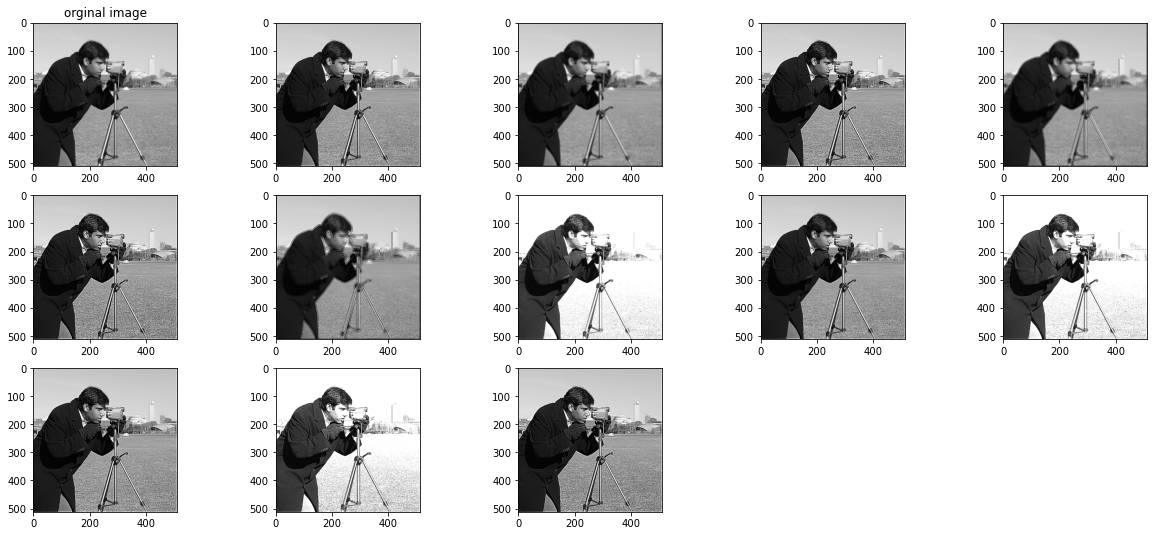

In [8]:
fig = plt.figure(figsize=(21,9))
org = fig.add_subplot(3,5,1)
org.imshow(img,cmap='gray')
org.set_title("orginal image")

test1_img =fig.add_subplot(3,5,2)
test1_img.imshow(Laplace(1),cmap='gray')

test2_img = fig.add_subplot(3,5,3)
test2_img.imshow(Laplace(2),cmap='gray')

test3_img = fig.add_subplot(3,5,4)
test3_img.imshow(Laplace(3),cmap='gray')

test4_img = fig.add_subplot(3,5,5)
test4_img.imshow(Laplace(4),cmap='gray')

test5_img = fig.add_subplot(3,5,6)
test5_img.imshow(Laplace(5),cmap='gray')

test6_img = fig.add_subplot(3,5,7)
test6_img.imshow(Laplace(6),cmap='gray')

test7_img = fig.add_subplot(3,5,8)
test7_img.imshow(Laplace(7),cmap='gray')

test8_img = fig.add_subplot(3,5,9)
test8_img.imshow(Laplace(8),cmap='gray')

test9_img = fig.add_subplot(3,5,10)
test9_img.imshow(Laplace(9),cmap='gray')

test10_img = fig.add_subplot(3,5,11)
test10_img.imshow(Laplace(10),cmap='gray')

test11_img = fig.add_subplot(3,5,12)
test11_img.imshow(Laplace(11),cmap='gray')

test12_img = fig.add_subplot(3,5,13)
test12_img.imshow(Laplace(12),cmap='gray')

plt.show()